In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Coffe_sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
# преобразовать категориальные признаки в category
# df['column'] = df.column.astye('category')
categorical_columns = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df['money']
X = df.drop('money', axis=1)

In [ ]:
X.head(n=3) # первые 3 строки перменной X, удостоверимя что money не существует

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [ ]:
y.head(n=3)

,money
0,38.7
1,38.7
2,38.7


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [ ]:
df.head(n=3)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000


In [ ]:
# целевая переменная
y = df["money"]

# признаки (убираем alcohol)
X = df.drop(columns=["money"])


In [ ]:
X.describe(include='all')

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547,3547,3547,3547,3547.0,3547.0,3547,3547
unique,NaN,1,8,3,7,12,7.0,12.0,381,3547
top,NaN,card,Americano with Milk,Afternoon,Tue,Mar,2.0,3.0,2024-10-11,22:59:18.544000
freq,NaN,3547,809,1205,572,494,572.0,494.0,26,1
mean,14.185791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.234010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


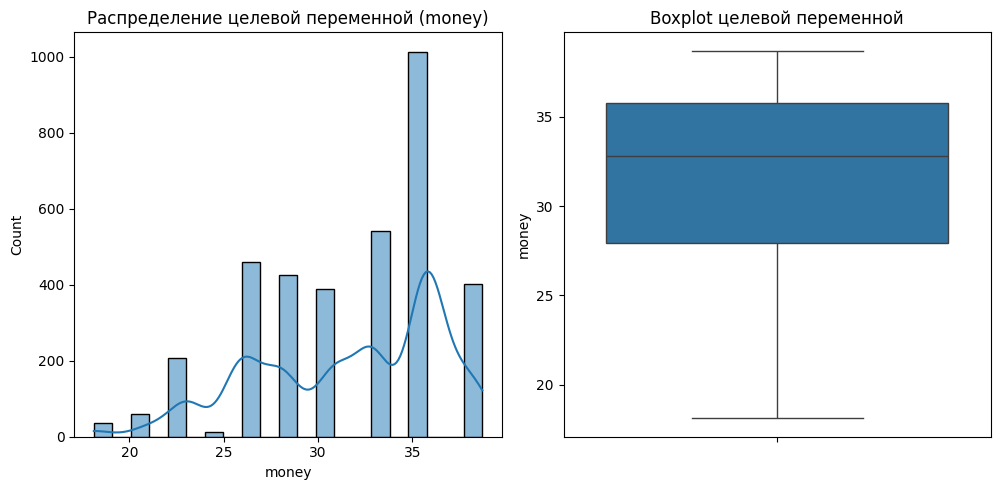

Статистики целевой переменной (money):
Среднее: 31.65
Медиана: 32.82
Стандартное отклонение: 4.88
Минимум: 18.12
Максимум: 38.70
Квартили:
count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64


In [ ]:
# Анализ распределения целевой переменной
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['money'], kde=True)
plt.title('Распределение целевой переменной (money)')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['money'])
plt.title('Boxplot целевой переменной')

plt.tight_layout()
plt.show()

# Статистики целевой переменной
print("Статистики целевой переменной (money):")
print(f"Среднее: {df['money'].mean():.2f}")
print(f"Медиана: {df['money'].median():.2f}")
print(f"Стандартное отклонение: {df['money'].std():.2f}")
print(f"Минимум: {df['money'].min():.2f}")
print(f"Максимум: {df['money'].max():.2f}")
print(f"Квартили:\n{df['money'].describe()}")

Выводы:
Распределение резко отличается от нормального - имеет асимметрию.
Концентрация большинства значений: в диапазоне 28-36. Возможно это из-за крупных заказов.

В боксплоте выбросов нет.


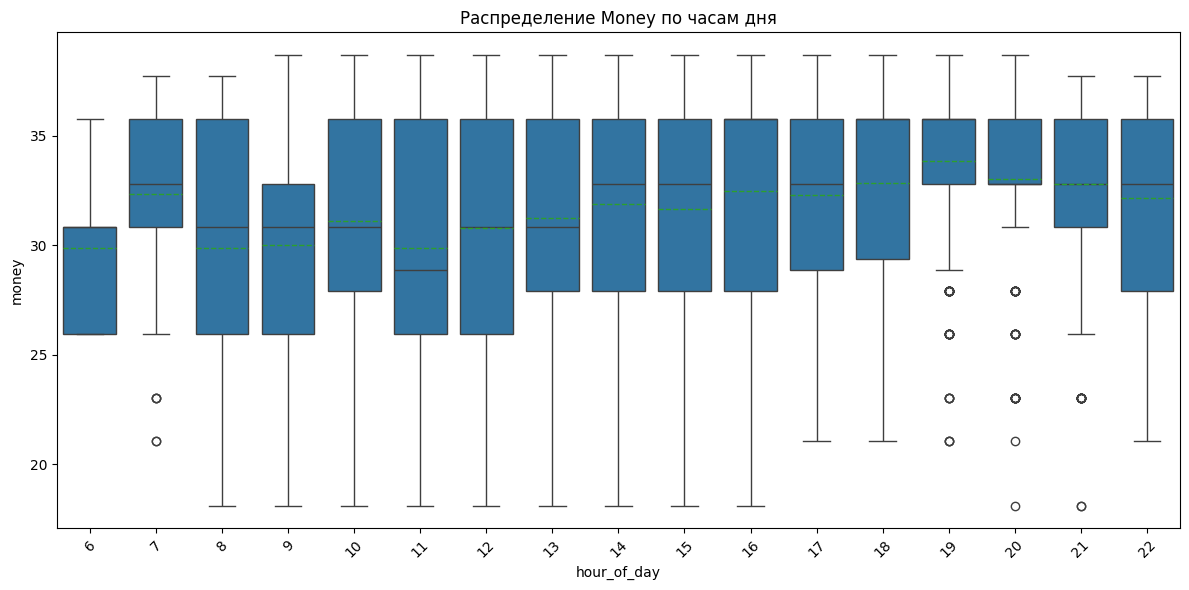

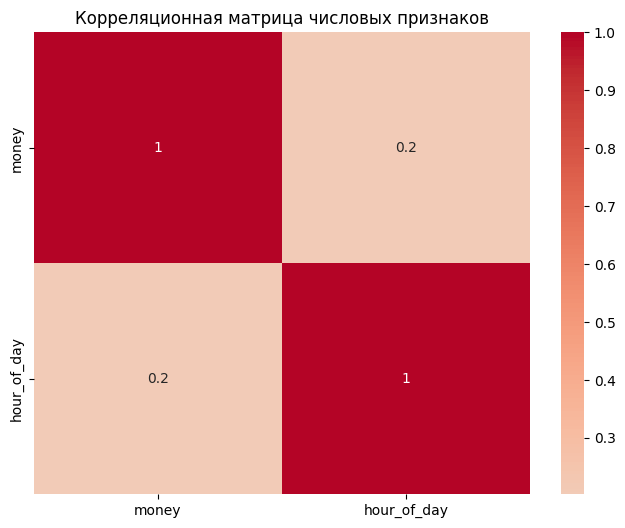

In [ ]:
# Анализ числовых признаков с помощью boxplot
numeric_features = ['hour_of_day']

for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='hour_of_day', y='money', showmeans=True, meanline=True)
    plt.title(f'Распределение Money по часам дня')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


numeric_df = df[['money', 'hour_of_day']]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

**График** позволяет увидеть закономерности в зависимости от времени суток.

Основные наблюдения:
В утренние часы (6-10) медианы низкие, ящики короткие (малая изменчивость). Пика нет.
В 7 есть выбросы. Значения аномально низкие

В обеденные часы (12-14) медианы высокие, возможно, большой разброс (широкий ящик) из-за того, что есть как высокие, так и средние значения. Это пик.

В вечерние часы (18-22) медианы также высокие, но разброс меньше, чем в обед.
С 9 до 21 есть выбросы. Значения аномально низкие.



**Коэффициент корреляции** hour_of_day и money равен 0.2, что указывает на слабую положительную корреляцию.

hour_of_day и money практически не связаны - время дня практически не влияет на сумму покупки кофе

Количество уникальных значений в категориальных признаках:
coffee_name: 8 уникальных значений
Time_of_Day: 3 уникальных значений
Weekday: 7 уникальных значений
Month_name: 12 уникальных значений
cash_type: 1 уникальных значений
Monthsort: 12 уникальных значений
Weekdaysort: 7 уникальных значений

Статистика по coffee_name:
                      mean  count   std
coffee_name                            
Hot Chocolate        35.99    276  1.44
Cappuccino           35.88    486  1.82
Cocoa                35.65    239  1.23
Latte                35.50    757  1.82
Americano with Milk  30.59    809  1.88

Статистика по Time_of_Day:
              mean  count   std
Time_of_Day                    
Night        32.89   1161  4.43
Afternoon    31.64   1205  4.92
Morning      30.42   1181  4.94

Статистика по Weekday:
          mean  count   std
Weekday                    
Mon      31.92    544  4.51
Sun      31.83    419  4.88
Tue      31.76    572  4.74
Fri      31.58    532  4.91
Thu      31.55 

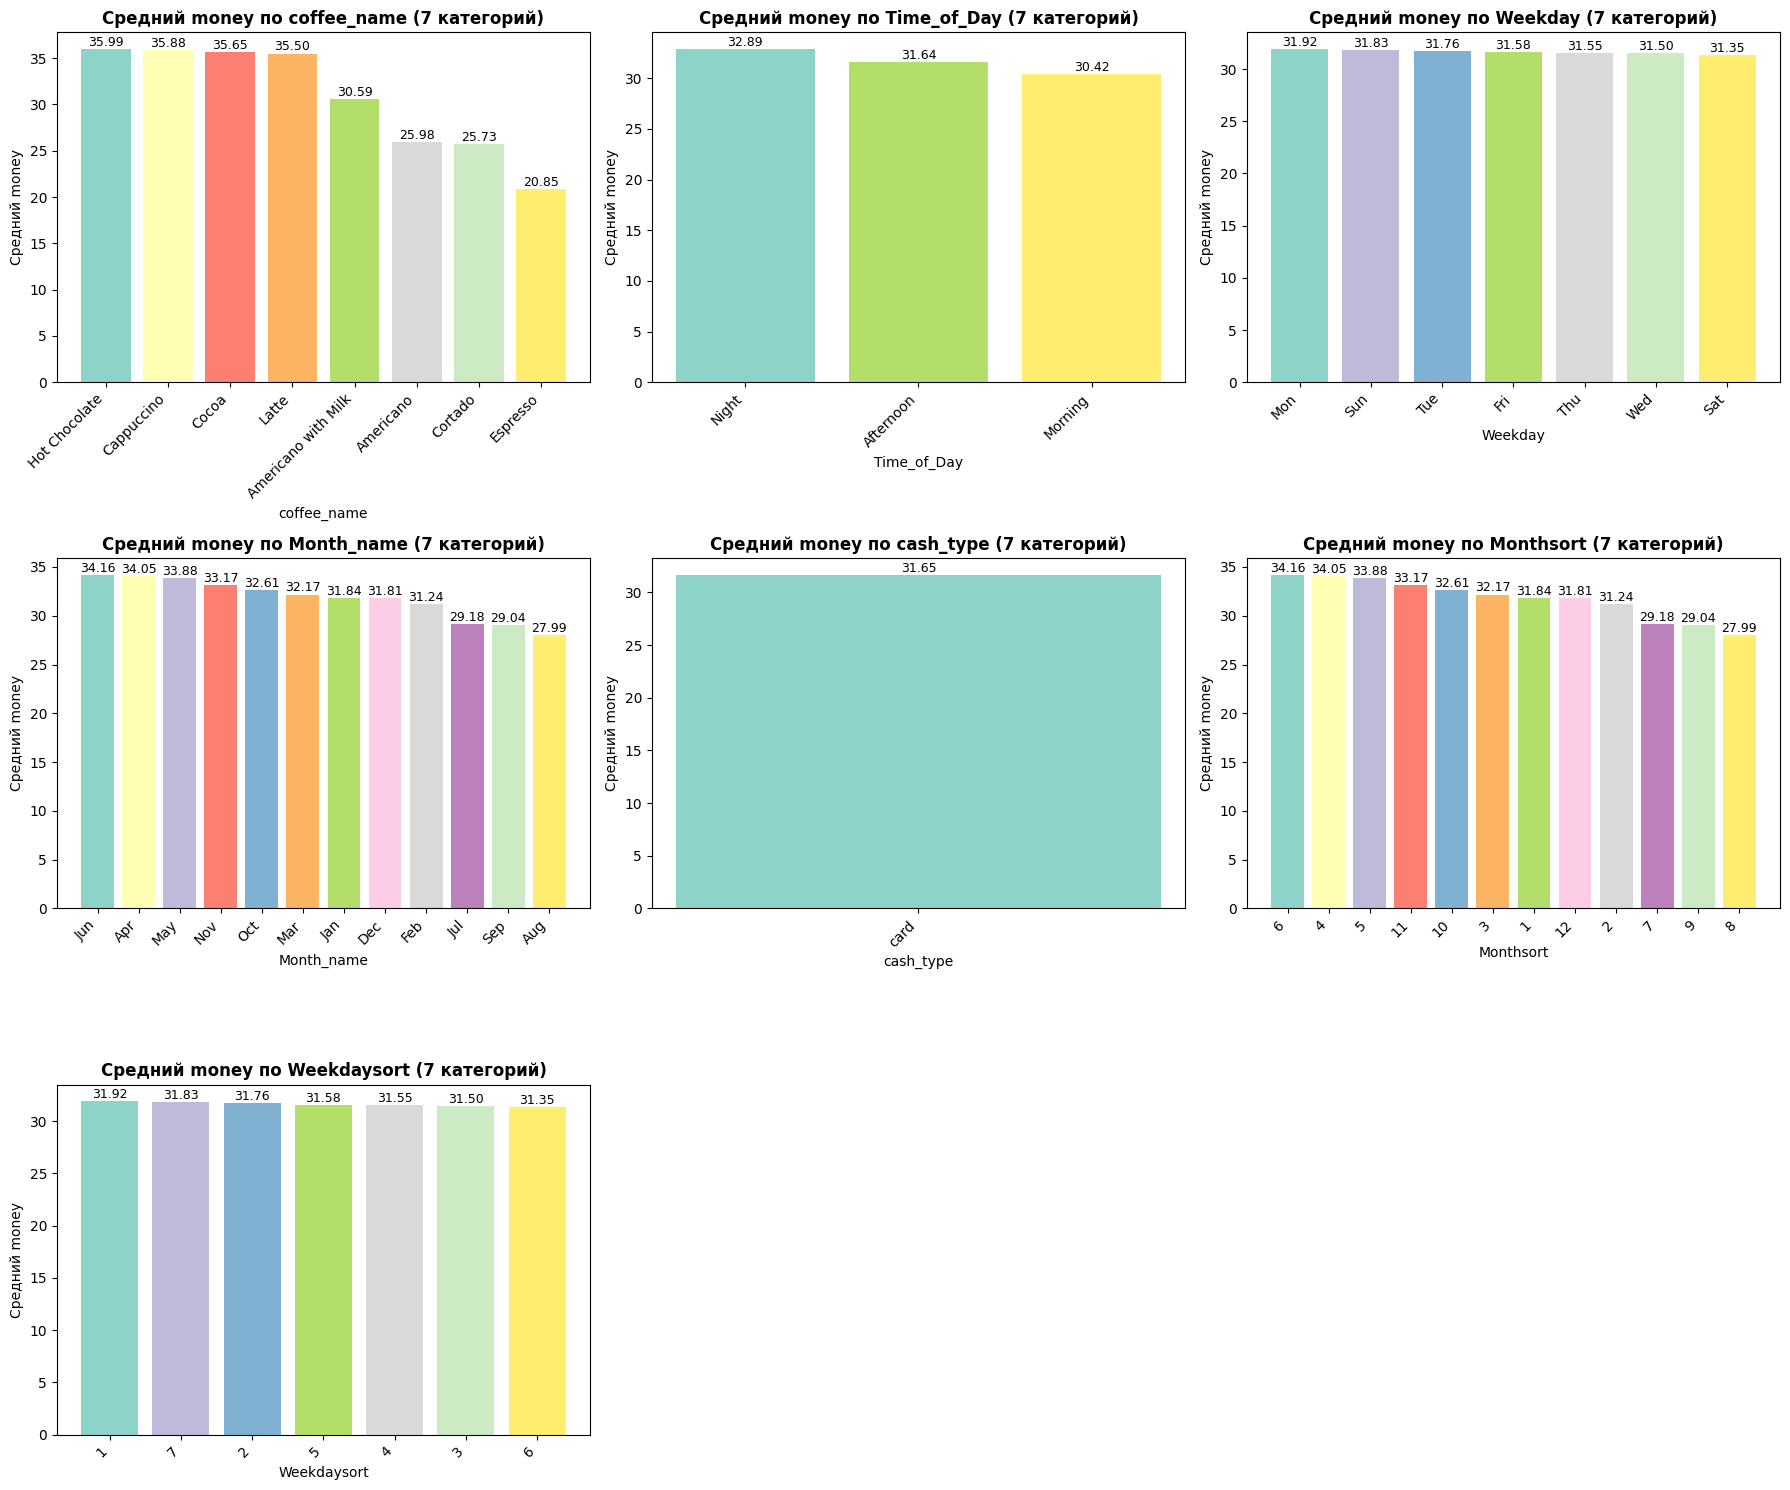

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_features = ['coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'cash_type', 'Monthsort', 'Weekdaysort']

print("Количество уникальных значений в категориальных признаках:")
for feature in categorical_features:
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count} уникальных значений")

n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    unique_count = df[feature].nunique()

    # Вычисляем средние значения money по категориям
    category_means = df.groupby(feature)['money'].mean().sort_values(ascending=False)

    # Столбчатая диаграмма
    bars = axes[i].bar(range(len(category_means)), category_means.values,
                       color=plt.cm.Set3(np.linspace(0, 1, len(category_means))))
    axes[i].set_title(f'Средний money по {feature}{title_suffix}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Средний money')

    for j, (bar, value) in enumerate(zip(bars, category_means.values)):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.2f}', ha='center', va='bottom', fontsize=9)

    axes[i].set_xticks(range(len(category_means)))
    axes[i].set_xticklabels(category_means.index, rotation=45, ha='right')

    category_stats = df.groupby(feature)['money'].agg(['mean', 'count', 'std']).sort_values('mean', ascending=False)
    print(f"\nСтатистика по {feature}:")
    print(category_stats.head().round(2))

# Скрываем пустые subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Выводы:

Средний money по coffee_name:

Большего всего стоит Hot chocolate, а меньше всего Espresso.

Средний money по Time_of day:

Выручка вечером и днем больше чем утром.

Средний money по Weekday:

В любой день недели примерное одинакое значение денег.

Средний money по Month_name:

Самый прибыльный месяц - Июль. Самый неприбыльный - Август.

Средний money по cash_type:

Можно вообще не рассматривать.

Средний money по Monthsort:

Такие же значения как в Months:

Средний money по Weekdayort:

Такие же значения как в Weekday.

In [ ]:
# Проверка пропусков
print("Пропуски в данных:")
print(df.isnull().sum())

# Если бы были пропуски, вот как бы мы с ними боролись:
def handle_missing_data(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())
            print(f"Заполнены пропуски в {col} медианой: {df[col].median()}")

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"Заполнены пропуски в {col} модой: {mode_val}")

    return df

# В нашем случае пропусков нет, но если бы были:
# df = handle_missing_data(df)

Пропуски в данных:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [ ]:
categorial_features = ['coffee_name']
numeric_features = [] # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

X = df[best_features]
y = df.money

In [ ]:
X.head(n=2)

,coffee_name
0,Latte
1,Hot Chocolate


In [ ]:
y.head()

,money
0,38.7
1,38.7
2,38.7
3,28.9
4,38.7


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["coffee_name"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
encoder.categories_

[array(['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa',
        'Cortado', 'Espresso', 'Hot Chocolate', 'Latte'], dtype=object)]

In [ ]:
encoder.get_feature_names_out()

array(['coffee_name_Americano', 'coffee_name_Americano with Milk',
       'coffee_name_Cappuccino', 'coffee_name_Cocoa',
       'coffee_name_Cortado', 'coffee_name_Espresso',
       'coffee_name_Hot Chocolate', 'coffee_name_Latte'], dtype=object)

In [ ]:
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = X.drop('coffee_name', axis=1) if 'coffee_name' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'coffee_name_Americano' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

In [ ]:
X

,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)


In [ ]:
#преобразование категориальных переменных в числовые
from sklearn.compose import ColumnTransformer
def prepare_data_for_model(X, y):

    X_prepared = X.copy()
    y_prepared = y.copy()

    categorical_columns = X_prepared.select_dtypes(include=['object', 'category']).columns

    if len(categorical_columns) > 0:
        print(f"Найдены категориальные колонки: {list(categorical_columns)}")

        ct = ColumnTransformer(
            transformers=[
                ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
            ],
            remainder='passthrough'
        )

        X_prepared = ct.fit_transform(X_prepared)

        feature_names = []
        for i, col in enumerate(categorical_columns):
            categories = ct.named_transformers_['onehot'].categories_[i]
            for cat in categories[1:]:  # пропускаем первую категорию из-за drop='first'
                feature_names.append(f"{col}_{cat}")

        numeric_columns = X.select_dtypes(include=[np.number]).columns
        feature_names.extend(numeric_columns)

        X_prepared = pd.DataFrame(X_prepared, columns=feature_names, index=X.index)
        print("Категориальные переменные преобразованы с помощью OneHotEncoder")

    X_prepared = X_prepared.fillna(0)
    y_prepared = y_prepared.fillna(0) if hasattr(y_prepared, 'fillna') else y_prepared

    X_array = X_prepared.astype(np.float64)
    y_array = np.array(y_prepared, dtype=np.float64).ravel()

    print(f"Итоговые размерности: X {X_array.shape}, y {y_array.shape}")
    return X_array, y_array
X_processed, y_processed = prepare_data_for_model(X, y)
model = LinearRegression()
model.fit(X_processed, y_processed)
print("✅ Модель успешно обучена!")


Итоговые размерности: X (3547, 8), y (3547,)
✅ Модель успешно обучена!


### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# 3. Создаем DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_processed.columns, index=X.index)

print(f"Результат: {X_scaled_df.shape}")
print("✅ StandardScaler успешно применен!")

Результат: (3547, 8)
✅ StandardScaler успешно применен!


### Модель

МОДЕЛЬ 1: Все признаки, обучение на всей выборке
Метрики для всей выборки:
MAE = 1.283
MAPE=0.042, MAPE_as_percent=4.249%
R² = 0.867
MSE = 3.171
RMSE = 1.781


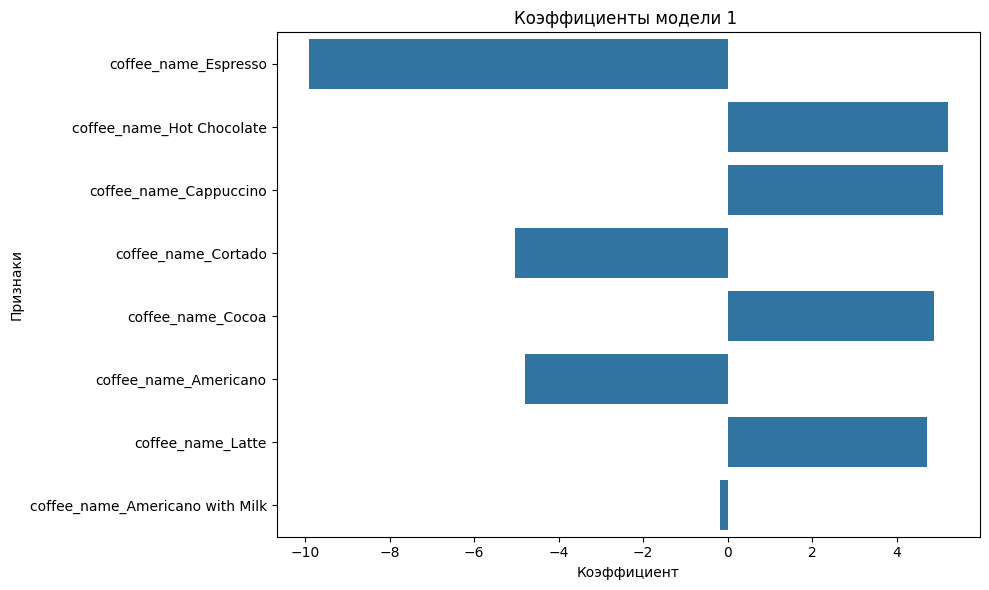



МОДЕЛЬ 2: Все признаки, train/test split
Метрики для обучающей выборки:
MAE = 1.275
MAPE=0.042, MAPE_as_percent=4.227%
R² = 0.870
MSE = 3.121
RMSE = 1.767
Метрики для тестовой выборки:
MAE = 1.355
MAPE=0.045, MAPE_as_percent=4.452%
R² = 0.852
MSE = 3.375
RMSE = 1.837


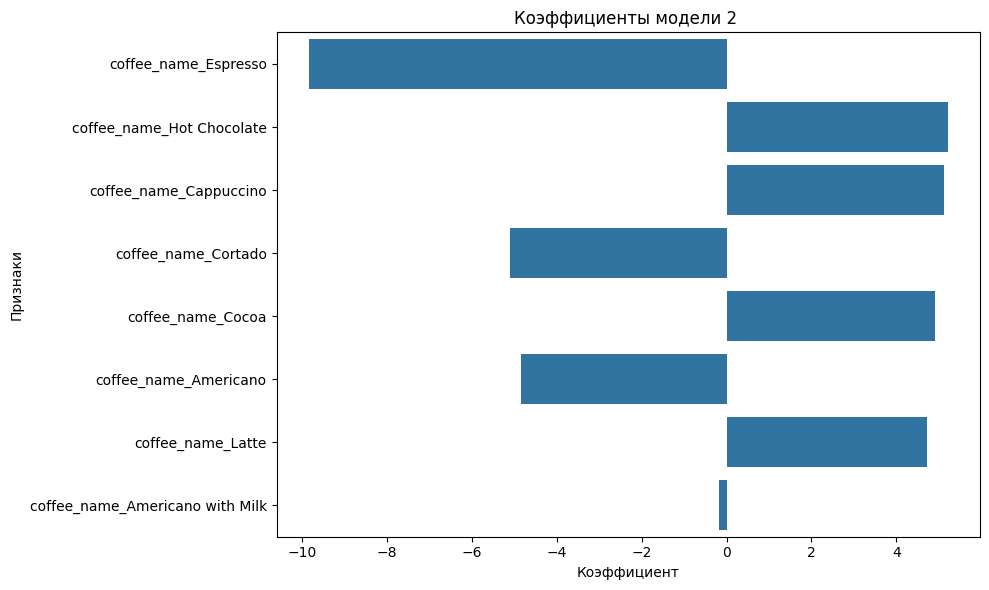



МОДЕЛЬ 3: Отобранные признаки, обучение на всей выборке
Метрики для всей выборки (отобранные признаки):
MAE = 3.128
MAPE=0.105, MAPE_as_percent=10.452%
R² = 0.359
MSE = 15.251
RMSE = 3.905


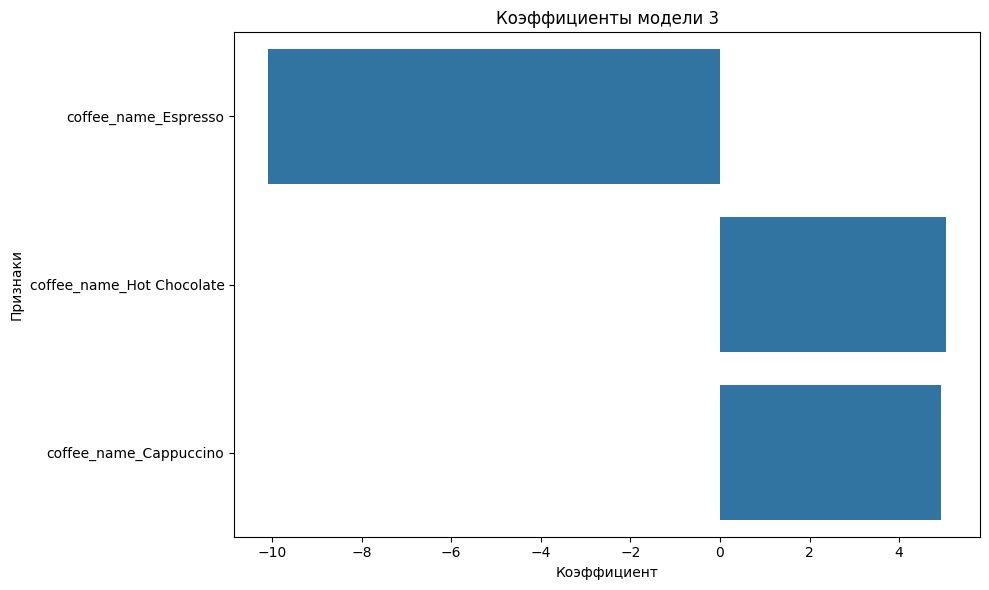



МОДЕЛЬ 4: Отобранные признаки, train/test split
Метрики для обучающей выборки (отобранные признаки):
MAE = 3.107
MAPE=0.104, MAPE_as_percent=10.401%
R² = 0.364
MSE = 15.260
RMSE = 3.906
Метрики для тестовой выборки (отобранные признаки):
MAE = 3.192
MAPE=0.106, MAPE_as_percent=10.551%
R² = 0.335
MSE = 15.220
RMSE = 3.901


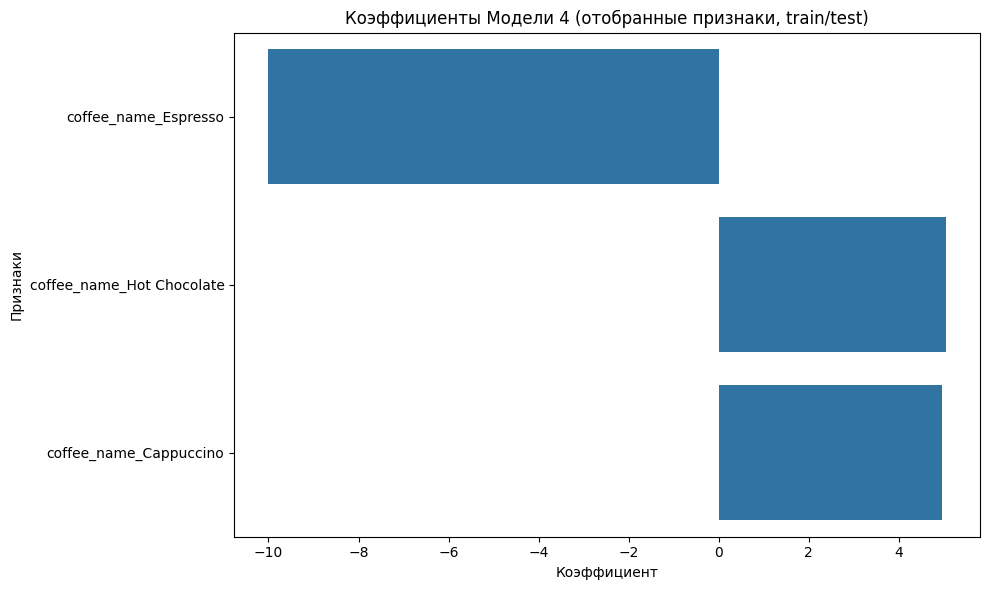



СРАВНЕНИЕ МЕТРИК


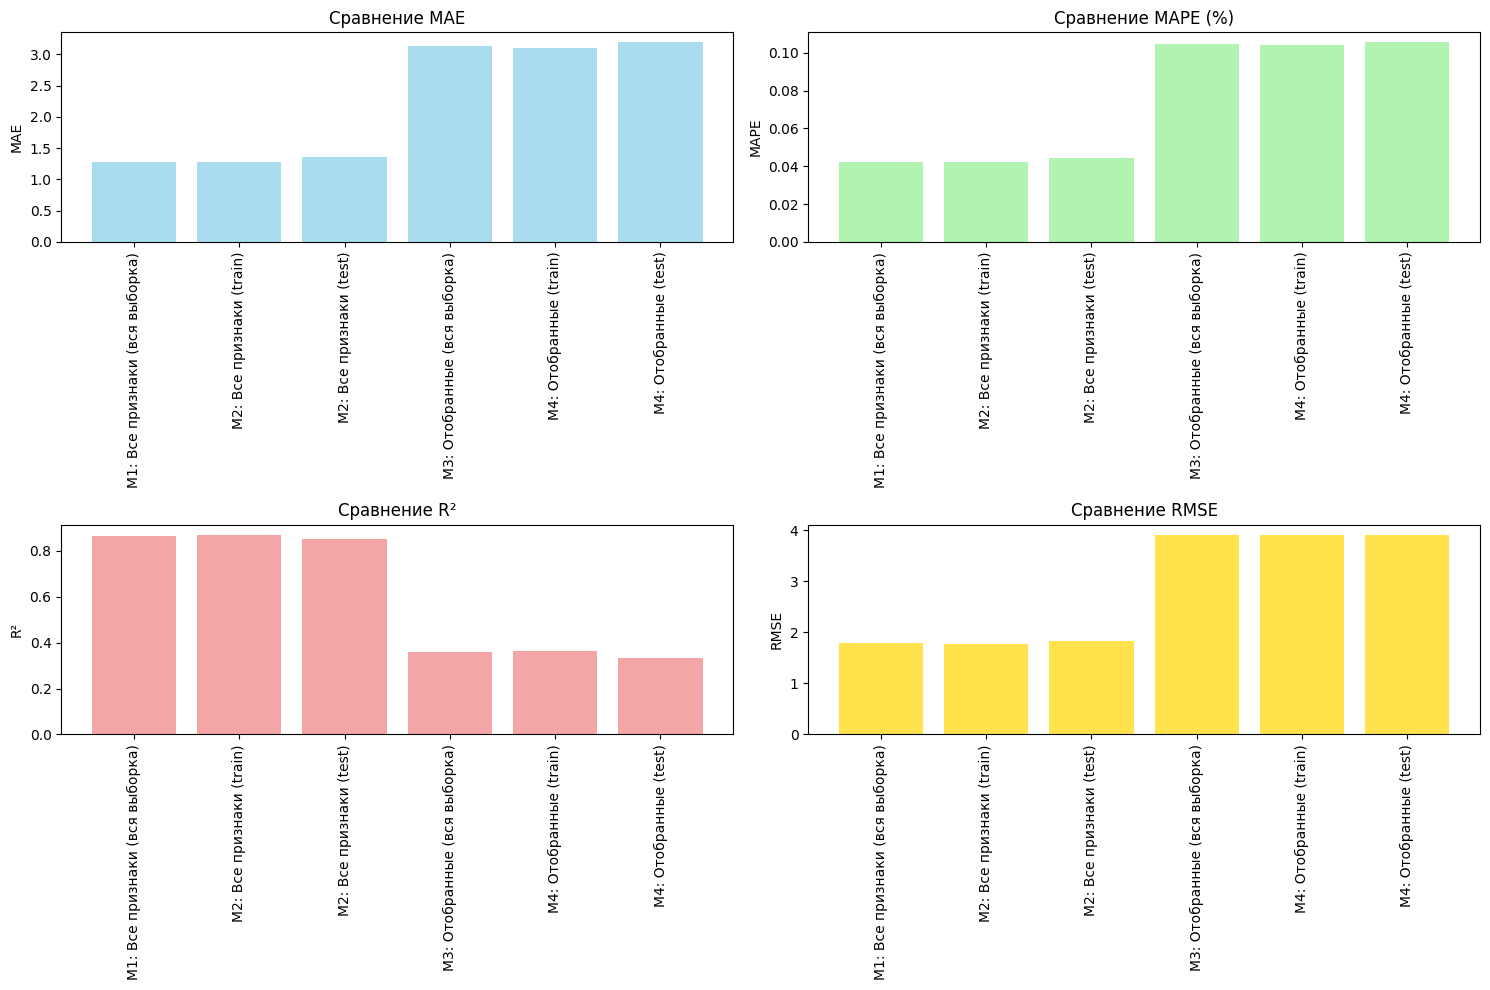




 Анализ переобучения Модели 2:
R² train: 0.870, R² test: 0.852, Разница: 0.018
Переобучения нет

 Анализ переобучения Модели 4:
R² train: 0.364, R² test: 0.335, Разница: 0.030
Переобучения нет


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Функция для вычисления метрик
def calculate_metrics(y_true, y_pred, dataset_name=""):
    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)



    print('MAE = %.3f' % MAE)
    print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))
    print('R² = %.3f' % R2)
    print('MSE = %.3f' % MSE)
    print('RMSE = %.3f' % RMSE)

    return MAE, MAPE, R2, MSE, RMSE

def plot_coefficients(model, features, title):
    plt.figure(figsize=(10, 6))
    coefficients_df = pd.DataFrame({
        'feature': features,
        'coefficient': model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)

    sns.barplot(data=coefficients_df, x='coefficient', y='feature', orient="h")
    plt.xlabel("Коэффициент")
    plt.ylabel("Признаки")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return coefficients_df

print("МОДЕЛЬ 1: Все признаки, обучение на всей выборке")

# Модель 1: Все признаки, вся выборка
model1 = LinearRegression()
model1.fit(X, y)
y_pred1 = model1.predict(X)

print("Метрики для всей выборки:")
mae1, mape1, r2_1, mse1, rmse1 = calculate_metrics(y, y_pred1)

coefficients1 = plot_coefficients(model1, X.columns, "Коэффициенты модели 1 ")

# Выбираем лучшие признаки для моделей 3 и 4
top_features = coefficients1.head(3)['feature'].tolist()

print("\n" )
print("МОДЕЛЬ 2: Все признаки, train/test split")

# Модель 2: Все признаки, train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

print("Метрики для обучающей выборки:")
mae_train2, mape_train2, r2_train2, mse_train2, rmse_train2 = calculate_metrics(y_train, y_train_pred2)

print("Метрики для тестовой выборки:")
mae_test2, mape_test2, r2_test2, mse_test2, rmse_test2 = calculate_metrics(y_test, y_test_pred2)

coefficients2 = plot_coefficients(model2, X.columns, "Коэффициенты модели 2 ")

print("\n" )
print("МОДЕЛЬ 3: Отобранные признаки, обучение на всей выборке")

# Модель 3: Отобранные признаки, вся выборка
X_top = X[top_features]

model3 = LinearRegression()
model3.fit(X_top, y)
y_pred3 = model3.predict(X_top)

print("Метрики для всей выборки (отобранные признаки):")
mae3, mape3, r2_3, mse3, rmse3 = calculate_metrics(y, y_pred3)

coefficients3 = plot_coefficients(model3, top_features, "Коэффициенты модели 3")

print("\n" )
print("МОДЕЛЬ 4: Отобранные признаки, train/test split")

# Модель 4: Отобранные признаки, train/test split
X_top_train = X_train[top_features]
X_top_test = X_test[top_features]

model4 = LinearRegression()
model4.fit(X_top_train, y_train)

y_train_pred4 = model4.predict(X_top_train)
y_test_pred4 = model4.predict(X_top_test)

print("Метрики для обучающей выборки (отобранные признаки):")
mae_train4, mape_train4, r2_train4, mse_train4, rmse_train4 = calculate_metrics(y_train, y_train_pred4)

print("Метрики для тестовой выборки (отобранные признаки):")
mae_test4, mape_test4, r2_test4, mse_test4, rmse_test4 = calculate_metrics(y_test, y_test_pred4)

coefficients4 = plot_coefficients(model4, top_features, "Коэффициенты Модели 4 (отобранные признаки, train/test)")

# Сравнительная таблица метрик
print("\n" )
print("СРАВНЕНИЕ МЕТРИК")

comparison = pd.DataFrame({
    'Модель': [
        'М1: Все признаки (вся выборка)',
        'М2: Все признаки (train)',
        'М2: Все признаки (test)',
        'М3: Отобранные (вся выборка)',
        'М4: Отобранные (train)',
        'М4: Отобранные (test)'
    ],
    'MAE': [mae1, mae_train2, mae_test2, mae3, mae_train4, mae_test4],
    'MAPE': [mape1, mape_train2, mape_test2, mape3, mape_train4, mape_test4],
    'R²': [r2_1, r2_train2, r2_test2, r2_3, r2_train4, r2_test4],
    'RMSE': [rmse1, rmse_train2, rmse_test2, rmse3, rmse_train4, rmse_test4]
})

# Визуализация сравнения моделей
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Сравнение MAE
axes[0,0].bar(comparison['Модель'], comparison['MAE'], color='skyblue', alpha=0.7)
axes[0,0].set_title('Сравнение MAE')
axes[0,0].set_ylabel('MAE')
axes[0,0].tick_params(axis='x', rotation=90)

# Сравнение MAPE
axes[0,1].bar(comparison['Модель'], comparison['MAPE'], color='lightgreen', alpha=0.7)
axes[0,1].set_title('Сравнение MAPE (%)')
axes[0,1].set_ylabel('MAPE')
axes[0,1].tick_params(axis='x', rotation=90)

# Сравнение R²
axes[1,0].bar(comparison['Модель'], comparison['R²'], color='lightcoral', alpha=0.7)
axes[1,0].set_title('Сравнение R²')
axes[1,0].set_ylabel('R²')
axes[1,0].tick_params(axis='x', rotation=90)

# Сравнение RMSE
axes[1,1].bar(comparison['Модель'], comparison['RMSE'], color='gold', alpha=0.7)
axes[1,1].set_title('Сравнение RMSE')
axes[1,1].set_ylabel('RMSE')
axes[1,1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

print("\n")

# Анализ переобучения Модели 2
diff_r2_2 = r2_train2 - r2_test2
print(f"\n Анализ переобучения Модели 2:")
print(f"R² train: {r2_train2:.3f}, R² test: {r2_test2:.3f}, Разница: {diff_r2_2:.3f}")
if diff_r2_2 > 0.1:
    print("Возможно переобучение (разница R² > 0.1)")
else:
    print("Переобучения нет")

# Анализ переобучения Модели 4
diff_r2_4 = r2_train4 - r2_test4
print(f"\n Анализ переобучения Модели 4:")
print(f"R² train: {r2_train4:.3f}, R² test: {r2_test4:.3f}, Разница: {diff_r2_4:.3f}")
if diff_r2_4 > 0.1:
    print("Возможно переобучение (разница R² > 0.1)")
else:
    print("Переобучения нет")



Модель 1 (вся выборка) показывает, насколько хорошо модель запоминает данные.

Модель 2 (train/test) показывает реальную обобщающую способность.

Сравнение моделей 3 и 4:

Модели с отобранными признаками должны быть более интерпретируемыми.

Если метрики близки к полным моделям - отбор признаков успешен.

Наша модель лучше среднего, потому что R2 равен 0.85. Модель объясняет 85% изменчивости данных.

Похожесть коэффициентов моделей 1 и 2, а также 3 и 4, говорит о стабильности данных и модели. Значит модель не сильно зависит от разбиения и мы можем доверять коэффициентам.